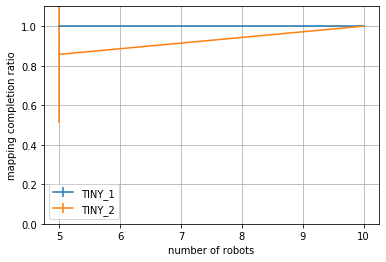

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [51]:
import random
import statistics
import scipy.stats
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import json
import AtlasScenarios
%matplotlib inline

#=== helper functions
    
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return (m, h)

#=== gather data

with open('AtlasLog_200428022117.json','r') as f:
    logs = json.loads(f.read())

data     = {}
for log in logs:
    scenarioName     = log['scenarioName']
    numRobots        = log['numRobots']
    mappingoutcome   = log['mappingoutcome']
    if scenarioName not in data:
        data[scenarioName]            = {}
    if numRobots not in data[scenarioName]:
        data[scenarioName][numRobots] = []
    if mappingoutcome=='success':
        data[scenarioName][numRobots] += [1]
    else:
        data[scenarioName][numRobots] += [0]

#=== create plot

(fig,ax) = plt.subplots()
lines    = []
for scenario in data.keys():
    x    = []
    y    = []
    yerr = []
    for (k,v) in data[scenario].items():
        x    += [k]
        (m,h) = mean_confidence_interval(v)
        y    += [m]
        yerr += [h]
    lines    += [ax.errorbar(x, y, yerr=yerr,label=scenario[len('SCENARIO_'):])]
ax.grid(True, zorder=5)
plt.xlabel('number of robots')
plt.ylim(0,1.1)
plt.ylabel('mapping completion ratio')
plt.legend(handles=lines)
plt.show()
fig.savefig('completion ratio.eps',bbox_inches='tight')